# 비슷한 연예인 사진 찾기

In [1]:
import face_recognition
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
# image_path = os.getenv('HOME')+'/aiffel/face_embedding/images/celebrity/승희.jpeg' 
path_to_save = os.getenv('HOME')+'/aiffel/face_embedding/embed/' 
   # 이미지에서 얼굴영역만 잘라낸 cropped_face를 그려 봅니다.

## 이미지 얼굴 인식 후 자르기 

In [2]:
def get_gropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    # print(face_locations)  # 이미지에서 얼굴 영역의 좌표를 출력합니다.
    %matplotlib inline
    import matplotlib.pyplot as plt
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]
    
    return cropped_face

## 이미지 임베딩 벡터 저장

In [3]:
dir_path = os.getenv('HOME')+'/aiffel/face_embedding/images/celebrity/'
image_file = os.path.join(dir_path, '나2.PNG')
face = get_gropped_face(image_file)   # 얼굴 영역을 구하는 함수(이전 스텝에서 구현)

# 얼굴 영역을 가지고 얼굴 임베딩 벡터를 구하는 함수
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

embedding = get_face_embedding(face)  
print(len(embedding[0]))

128


## 저장소에 있는 사진 임베딩 딕셔너리 구하고 자른사진 저장

In [4]:
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    a = 0
    for file in file_list:
        image_file = os.path.join(dir_path,file)
        print(file)
        face = get_gropped_face(image_file)
        embedimg = Image.fromarray(face)
        embedimg.save(path_to_save + os.path.splitext(file)[0], format = 'jpeg' )
        embedding = get_face_embedding(face)
        if len(embedding) != 0:
           embedding_dict[os.path.splitext(file)[0]] = embedding[0] 
        a += 1
        # print(file)
        print(a)
        # if len(embedding) != 0:
        #     embedding_dict[os.path.splitext(file)[0]] = embedding[0]
        
    return embedding_dict

In [5]:
# 가장 비슷한 임베딩 구하기
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

In [6]:
embedding_dict = get_face_embedding_dict(dir_path)



잇지예지.jpeg
1
정수빈.jpg
2
슬리피.jpg
3
찬열.jpeg
4
슈가.jpg
5
이광수.jpg
6
biden.jpg
7
유지태.jpg
8
제이크 질렌할.jpeg
9
제이홉.jpg
10
제프리 힌턴.jpg
11
이경규.jpeg
12
도아.jpeg
13
아린.jpg
14
이준혁.jpeg
15
이성민.jpg
16
대도서관.jpeg
17
이대형.jpg
18
박정민.jpg
19
김학범.jpg
20
김C.jpeg
21
이천수.jpg
22
잇섭.jpg
23
아이즈원조유리.jpeg
24
수호.jpg
25
이동국.jpeg
26
지수.jpg
27
장원준.jpeg
28
최양락.jpg
29
문별.jpg
30
장원영.jpeg
31
크리스 햄스워스.jpg
32
박재범.jpg
33
개리.jpg
34
김희철.jpg
35
비니.jpg
36
박찬욱.jpeg
37
디오.jpeg
38
온앤오프효진.jpg
39
켄 정.jpeg
40
나2.PNG
41
나인뮤지스경리.jpg
42
전소미.jpg
43
레인보우재경.jpg
44
태양.jpeg
45
박나래.jpeg
46
카이.jpg
47
러블리즈지수.jpeg
48
잇지유나.jpg
49
성시경.jpg
50
노무현.jpeg
51
민니.jpg
52
미미.jpg
53
문재인.jpeg
54
박진영.jpg
55
제이콥 배털론.jpg
56
슬기.jpg
57
하정우.jpg
58
류진.jpg
59
박해일.jpeg
60
김래원.jpeg
61
노홍철.jpeg
62
박항서.jpg
63
지민(BTS).jpg
64
여자아이들수진.jpeg
65
이희준.jpg
66
김민재.jpeg
67
RM.jpg
68
홍구.jpg
69
옥냥이.jpeg
70
주호민.jpeg
71
방시혁.jpeg
72
케이.jpg
73
딕헌터.jpeg
74
이종석.jpeg
75
도지한.jpg
76
성룡.jpg
77
서현진.jpg
78
길.jpg
79
화사.jpg
80
트와이스모모.jpeg
81
우기.jpg
82
이제훈.jpeg
83
조이.jpg
84
첸.jpg
85
신비.jpg
86
숀 코네리.jpg
87


In [7]:
get_distance('승희','길')

0.6740029586392219

In [8]:
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

## 가장 비슷한 사진 5장 추리기

In [9]:
def get_nearest_face(name, top=5):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))
    
    for i in range(top+1):
        if i == 0 :
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}),거리({})'.format(i,
                                               sorted_faces[i][0],sort_key_func(sorted_faces[i][0])))
            
            ims = Image.open(path_to_save + sorted_faces[i][0])
            plt.imshow(ims)
            plt.axis('off')
            plt.show()

순위 1 : 이름(디오),거리(0.42147805067290317)


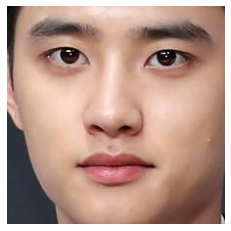

순위 2 : 이름(류현진),거리(0.4282835497381516)


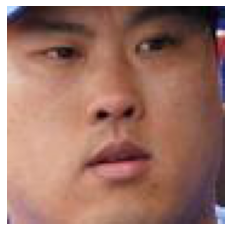

순위 3 : 이름(씨잼),거리(0.43077485250390074)


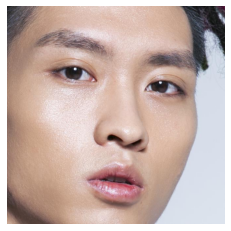

순위 4 : 이름(정국),거리(0.4372299110433493)


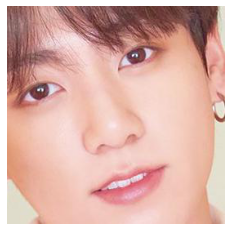

순위 5 : 이름(진),거리(0.43840234692034163)


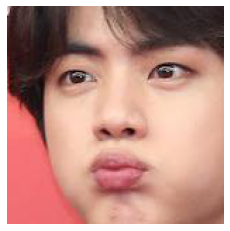

In [10]:
get_nearest_face('나2')

## 추가적인 시각화 (가장 닮은 사진 변화는 모습 보이기)

In [13]:
import cv2
# import matplotlib as plt
def onMouse(x):
    pass


def get_nearest_face_merge(name, top=1):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))
    
    for i in range(top+1):
        if i == 0 :
            continue
        if i == 1:
            a = cv2.imread(path_to_save + sorted_faces[i][0])
            a = cv2.resize(a,(100,100))
            b = cv2.imread(path_to_save + name)
            b = cv2.resize(b,(100,100))
            # cv2.namedWindow('imgpane')
            # cv2.createTrackbar('MIXING','imgpane',0,100,onMouse)
            # mix = cv2.getTrackbarPos('MIXING','imgpane')
            
            img1 = b
            img2 = cv2.addWeighted(a,0.25, b, 0.75, 0)
            img3 = cv2.addWeighted(a,0.5, b, 0.5, 0)
            img4 = cv2.addWeighted(a,0.75, b, 0.25, 0)
            img5 = a 
            
            imgmerge = cv2.hconcat([img1,img2,img3,img4,img5])
            imgmerge = cv2.resize(imgmerge,(1500,300))
            imgmerge = cv2.cvtColor(imgmerge, cv2.COLOR_BGR2RGB)
            imgmer = Image.fromarray(imgmerge)
            imgmer.save(path_to_save + '변화', format = 'jpeg')
            plt.imshow(imgmerge)
            plt.axis('off')
            plt.show()
            # k = cv2.waitkey(1) & 0xFF
            # if k == 27:
            #     break
            # mix = cv2.getTrackbarPos('MIXING','imgpane')
            # cv2.destroyAllWindows()
        # if sorted_faces[i]:
        #     print('순위 {} : 이름({}),거리({})'.format(i,
        #                                        sorted_faces[i][0],sort_key_func(sorted_faces[i][0])))
            
        #     ims = Image.open(path_to_save + sorted_faces[i][0])
        #     plt.imshow(ims)
        #     plt.axis('off')
        #     plt.show()

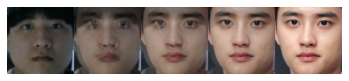

In [14]:
get_nearest_face_merge('나2')

이미지 결과물로는 크기와 상관없이 비율에 따라 정해져 마크다운으로 설정하였다
![변화](./image/변화)

---

## 고찰

이번 모델은 이미 완성되어있어 어렵지는 않았지만 완성된 모델을 다양한 시각화에 쓰는 것을 목적인 노드로 파악했다.  
얼굴을 자른 사진을 따로 저장하여 시각화에 사용하였다. 저장하는 저장할 다이렉트를 지정하고 저장함수를 이용하며  
format은 jpeg로 하였는데 이유가 파일을 부를 때 .jpg로 다 이름이 바뀔 줄 알았는데 그렇게 되지도 않아서 자른 사진을 이름만 지정하여 저장하였다.  
좀더 닮은지 확인하는 법은 가장 닯은 사진과 원본 사진을 비교하는 것이라 생각하여 점점 원본 사진에서 가장 닯은 사진으로 변하도록 하였다.  
사실 마우스로 조작하여 점점 변하는 모습을 볼 수 있게 만들려 했지만 주피터 노트북 과제 제출 특성상 구현하여도 제출 할때 모습이 보이지 않는 문제가 있어  
5장으로 25프로 50프로 75프로 겹칠때 모습을 구현하였다. 

### 이번의 변화 
좀 더 구글링에 익숙해지고 api를 찾는데 블로그나 깃허브가 한글이 아니면 차라리 파이썬 사이트나 api만든 사이트를 들어가 보는것이 나을 때가 많아  
블로그 틈새시장의 발견을 느꼈다. 